In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# Importing usefull libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

In [2]:
# Loading the Given dataset

df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
ds = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

**Exploratory Data Analysis**

In [3]:
print(df.shape)   # TO UNDERSTAND THE STRUCTURE
print(df.info())  # TO UNDERSTAND DATA TYPES

(175000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           

In [4]:
# Summary Staistics such as MEAN ,MEDIAN ,SD , MIN MAX Value etc.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


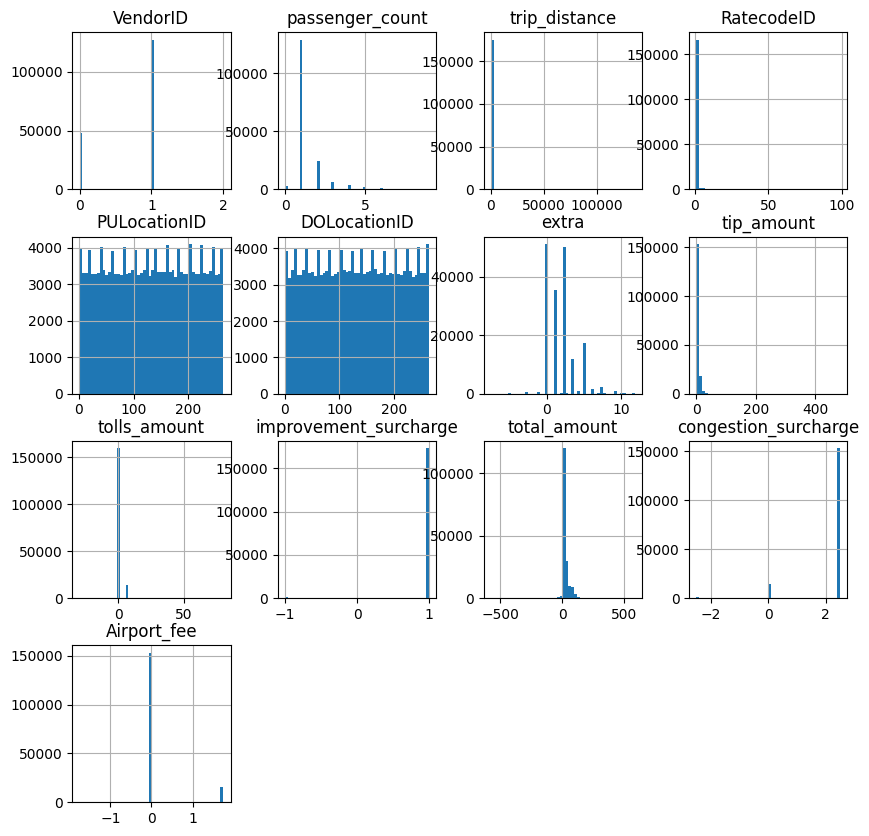

In [7]:
# analysis for numerical columns
num = list(df.select_dtypes('number').columns)
df[num].hist(figsize = (10,10), bins=50)
plt.show()

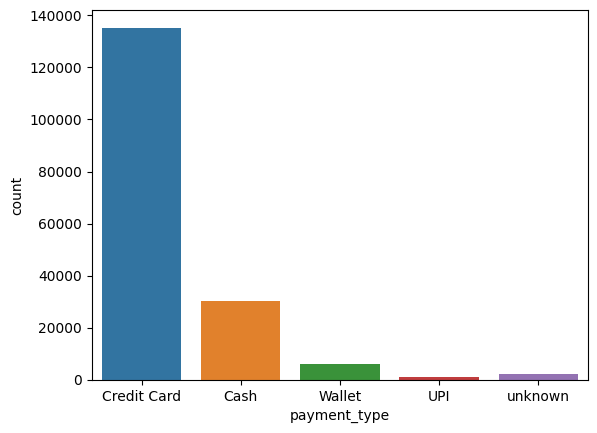

In [8]:
# Analysis for categorical column
sns.countplot(x='payment_type', data = df)
plt.show()

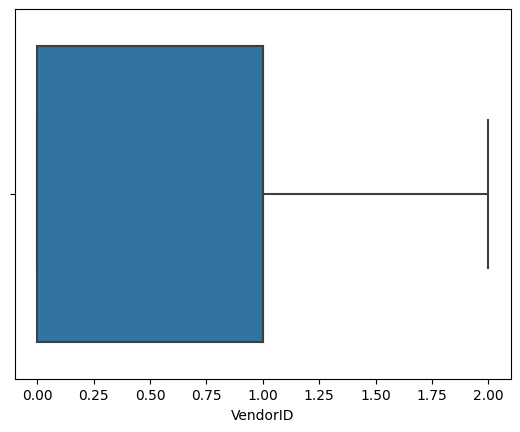

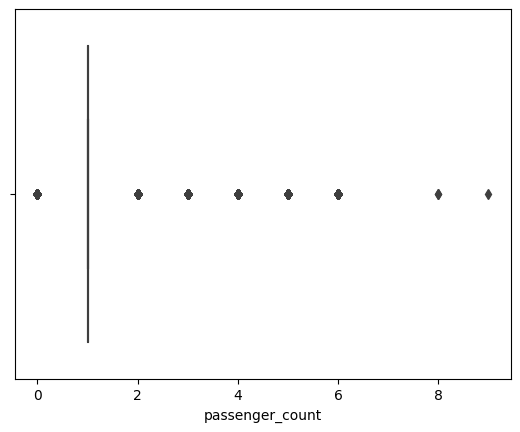

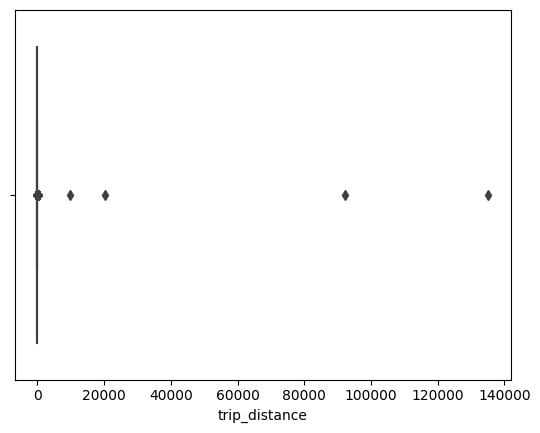

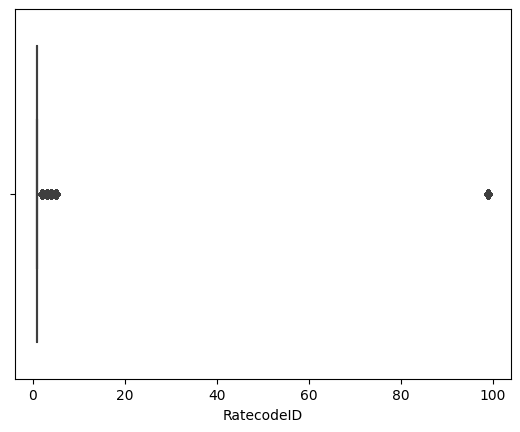

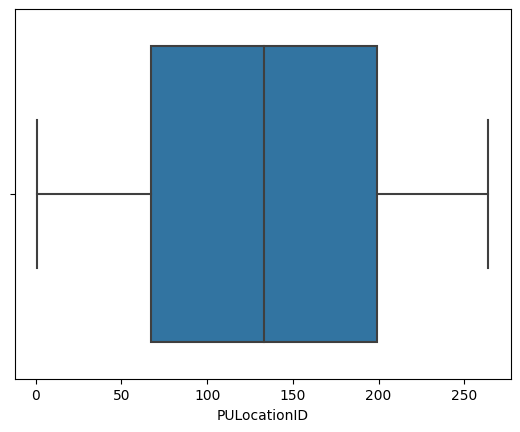

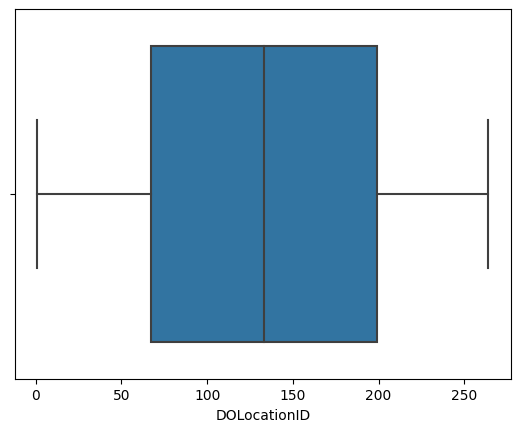

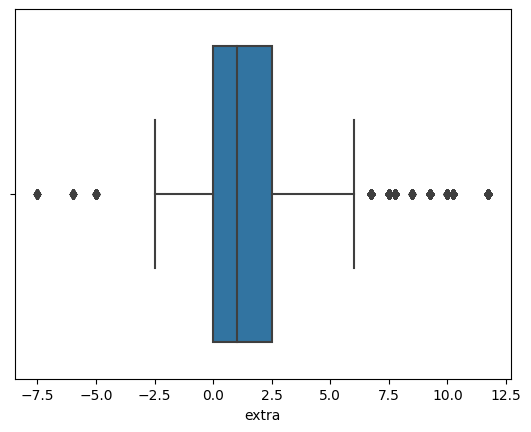

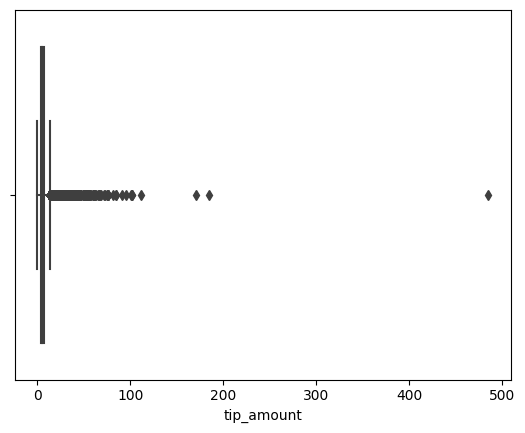

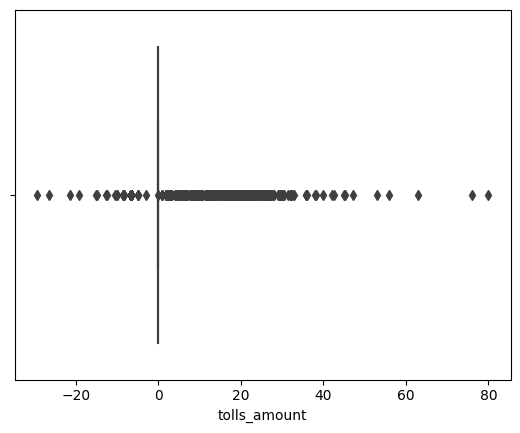

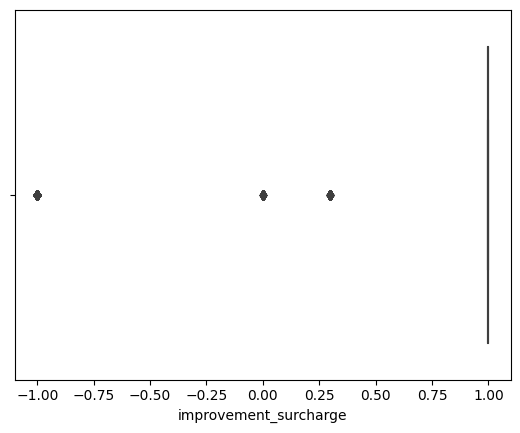

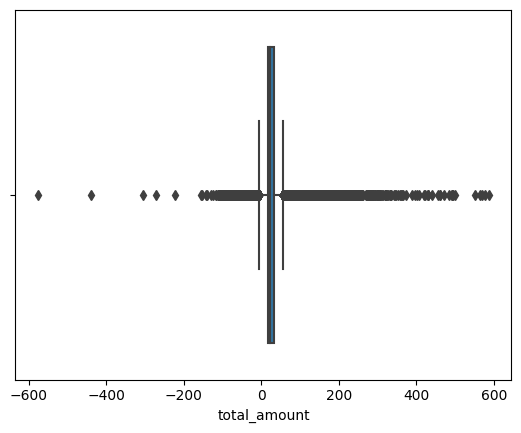

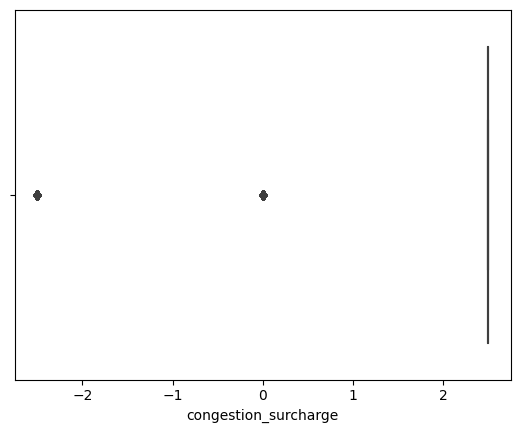

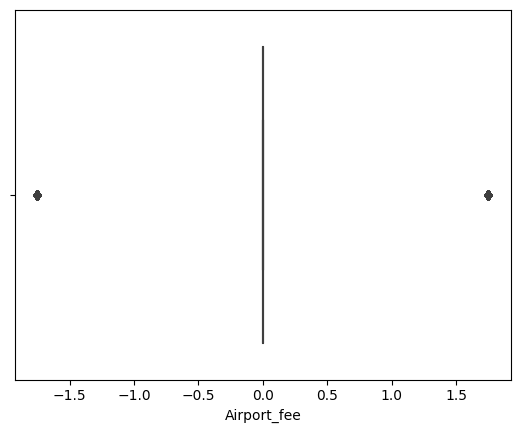

In [9]:
# Checking outliers
for i in num:
    sns.boxplot(x=i, data=df)
    plt.show()

In [12]:
# CONVERSION 
df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

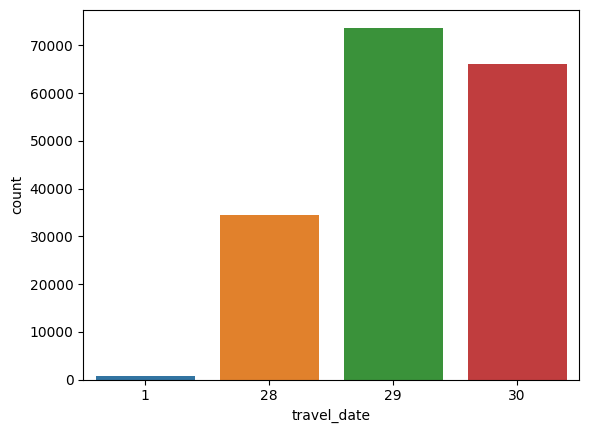

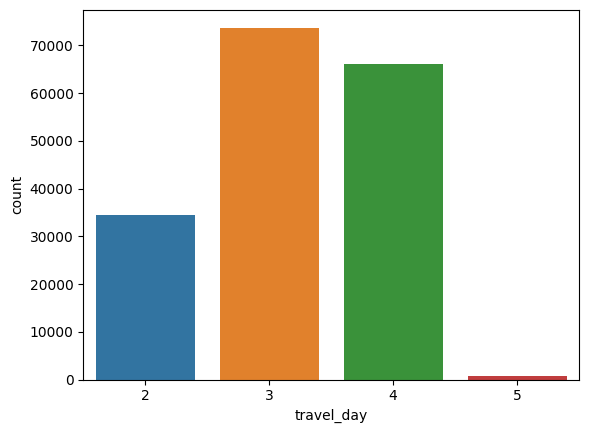

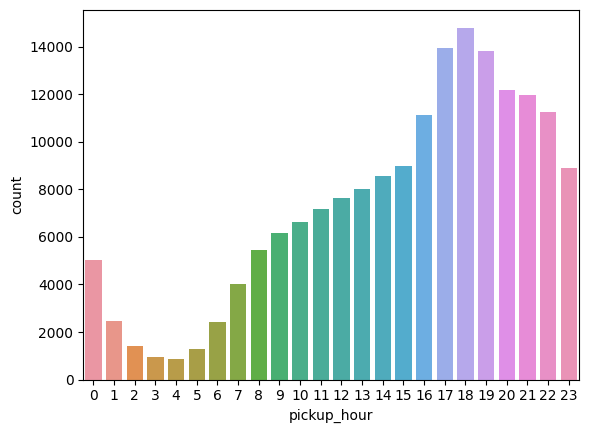

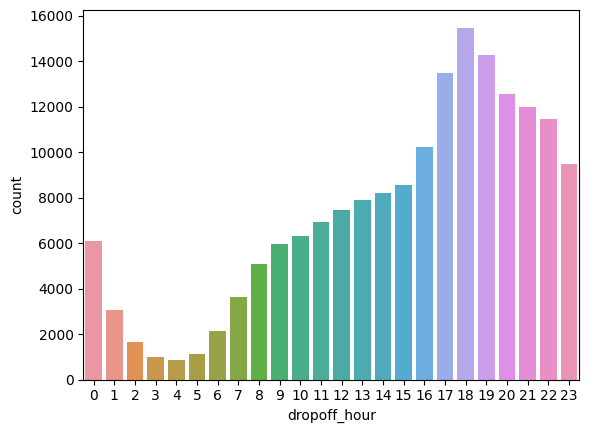

In [13]:
# Finding insites
df["travel_date"]=df["tpep_pickup_datetime"].dt.day
df["travel_day"]=df["tpep_pickup_datetime"].dt.dayofweek
df["pickup_hour"]=df["tpep_pickup_datetime"].dt.hour
df["dropoff_hour"]=df["tpep_dropoff_datetime"].dt.hour

sns.countplot(x="travel_date",data=df)
plt.show()

sns.countplot(x="travel_day",data=df)
plt.show()

sns.countplot(x="pickup_hour",data=df)
plt.show()

sns.countplot(x="dropoff_hour",data=df)
plt.show()

-----------------Train Dataset---------------------

In [ ]:
# Add a new column by substracting pickup and drop off datetime

from datetime import datetime
import math
duration = []
for i in range(len(df)):
  time1 = datetime.strptime(df.iloc[i,1], "%Y-%m-%d %H:%M:%S")
  time2 = datetime.strptime(df.iloc[i,2], "%Y-%m-%d %H:%M:%S")
  dura = abs(time2 - time1)
  duration.append(dura.total_seconds())
df["trip_duration"]=duration

In [ ]:
# Drop column after creating a new more infermative column named trip_duration

df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'] , axis = 1)

In [ ]:
# One Hot Encoding for transforming categorical variable

df = pd.get_dummies(df, columns=['store_and_fwd_flag', 'payment_type'], dtype='int')

In [ ]:
# Finding out correlation of "total_amount" with independamt column

exploration_set = df.copy()
corr_matrix = exploration_set.corr()
corr_matrix['total_amount']

In [ ]:
# Imput missing value of numerical col by "mean strategy"

imputer_num = SimpleImputer(strategy='mean')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

In [ ]:
# Checking if there is any null value prasent
df.isnull().sum()

In [ ]:
# Scaling the value of column with Standard Scaler

st = StandardScaler()
st.fit_transform(df)
df.head()

-------------------- Test Dataset ------------------------------

In [ ]:
# Add a new column by substracting pickup and drop off datetime

from datetime import datetime
import math
duration = []
for i in range(len(ds)):
  time1 = datetime.strptime(ds.iloc[i,1], "%Y-%m-%d %H:%M:%S")
  time2 = datetime.strptime(ds.iloc[i,2], "%Y-%m-%d %H:%M:%S")
  dura = abs(time2 - time1)
  duration.append(dura.total_seconds())
ds["trip_duration"]=duration

In [ ]:
# Drop column after creating a new more infermative column named trip_duration

ds = ds.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'] , axis = 1)

In [ ]:
# One Hot Encoding for transforming categorical variable

ds = pd.get_dummies(ds, columns=['store_and_fwd_flag', 'payment_type'], dtype='int')

In [ ]:
# Imput missing value of numerical col by "mean strategy"

imputer_num = SimpleImputer(strategy='mean')
numerical_cols = ds.select_dtypes(include=['float64', 'int64']).columns
ds[numerical_cols] = imputer_num.fit_transform(ds[numerical_cols])

In [ ]:
# Scaling the value of column with Standard Scaler

st = StandardScaler()
st.fit_transform(df)
df.head()

----------------- Fit Model ------------------------

In [ ]:
# SEPERATING FEATURE AND TARGET VARIABLE

X = df.drop('total_amount', axis=1)
y = df['total_amount']

In [ ]:
# test data for prediction
X_test1 = ds

In [ ]:
# Spliting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

**Implementing LinearRegression model**

In [ ]:
"""lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)"""

In [ ]:
# val_predictions = lr.predict(X_test)
# print(r2_score(y_test,val_predictions))

**Implementing KNN with Hyperparameter Tuning**

In [ ]:
"""from sklearn.model_selection import GridSearchCV
param_grid={"n_neighbors":[2,3,4,5,7,10],"p":[1,2]}
gs=GridSearchCV(knn,param_grid,cv=5)
gs.fit(X_train,y_train)
y1_pred=gs.best_estimator_.predict(X_test)
print(r2_score(y_test,y1_pred))"""

**Implementing DecisionTreeRegressor model**

In [ ]:
"""from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train)"""

In [ ]:
# val_predictions = dtr.predict(X_test)
# print(r2_score(y_test,val_predictions))

In [ ]:
# val_predictions = dtr.predict(X_test1)
# print(r2_score(y[:50000],val_predictions))

**Implementing RandomForestRegressor model**


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)

In [ ]:
val_predictions = model.predict(X_test1)
output1=val_predictions.flatten()
output1

In [ ]:
val_predictions = model.predict(X_test)
print(r2_score(y_test,val_predictions))

In [ ]:
submission = pd.DataFrame({"ID": np.arange(1,50001),
                           "total_amount": output1})

submission.to_csv('submission.csv',index=False)